In [91]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [92]:
import polars as pl
import numpy as np
from datetime import date
import silverfund.data_access_layer as dal
from silverfund.enums import Interval
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
start_date = date(2018, 1, 1)
end_date = date(2023, 12, 31)
interval = Interval.MONTHLY

In [94]:
universe = dal.load_universe(interval=interval, start_date=start_date, end_date=end_date)

training_data = universe.join(
        dal.load_barra_returns(interval=interval, start_date=start_date, end_date=end_date),
        on=["date", "barrid"],
        how="left",
).sort(["barrid", "date"])

training_data

Loading Barra Returns: 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]


date,barrid,currency,mktcap,price,logret,ret
date,str,str,f64,f64,f64,f64
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524
2018-01-31,"""USA06Z1""","""USD""",1.8598e9,16.75,0.283907,0.328309
2018-02-28,"""USA06Z1""","""USD""",7.8724e8,7.09,-0.859712,-0.576716
2018-03-29,"""USA06Z1""","""USD""",7.7392e8,6.97,-0.017069,-0.016925
2018-04-30,"""USA06Z1""","""USD""",9.1160e8,8.21,0.163738,0.177905
…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933


In [95]:
barra_total_risk = dal.load_total_risk(
    interval=interval, start_date=start_date, end_date=end_date, quiet=False
)

barra_total_risk

Loading Barra Total Risk: 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]


date,barrid,div_yield,histbeta,predbeta,spec_risk,total_risk
date,str,f64,f64,f64,f64,f64
2018-01-31,"""ARGAJH1""",0.0271813,0.040652,0.332505,0.245441,0.337619
2018-01-31,"""ARGAMY1""",0.026766,0.2672,0.580219,0.155936,0.191744
2018-01-31,"""ARGANC1""",0.0,-0.000129,0.251311,0.152533,0.210833
2018-01-31,"""ARGANJ1""",0.007406,-0.034492,0.109431,0.28861,0.404345
2018-01-31,"""ARGANQ1""",0.043647,-0.522839,0.29103,0.235554,0.280152
…,…,…,…,…,…,…
2023-12-29,"""USBPPH1""",null,1.078032,0.95078,0.181427,0.308507
2023-12-29,"""USBPPS1""",null,0.805638,0.983537,0.289836,0.407579
2023-12-29,"""USBPQA1""",null,1.241031,1.592499,0.728063,0.821866


In [96]:
df = training_data.join(
    barra_total_risk.select(["date", "barrid", "predbeta", "spec_risk"]),  # Select only relevant columns
    on=["date", "barrid"],
    how="left"
)

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk
date,str,str,f64,f64,f64,f64,f64,f64
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869
2018-01-31,"""USA06Z1""","""USD""",1.8598e9,16.75,0.283907,0.328309,1.532573,0.425867
2018-02-28,"""USA06Z1""","""USD""",7.8724e8,7.09,-0.859712,-0.576716,1.478852,0.555178
2018-03-29,"""USA06Z1""","""USD""",7.7392e8,6.97,-0.017069,-0.016925,1.610236,0.551955
2018-04-30,"""USA06Z1""","""USD""",9.1160e8,8.21,0.163738,0.177905,1.556109,0.547784
…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069


In [97]:
df = df.with_columns(pl.col('ret'))

df = df.drop_nulls(subset=["predbeta"])

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk
date,str,str,f64,f64,f64,f64,f64,f64
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869
2018-01-31,"""USA06Z1""","""USD""",1.8598e9,16.75,0.283907,0.328309,1.532573,0.425867
2018-02-28,"""USA06Z1""","""USD""",7.8724e8,7.09,-0.859712,-0.576716,1.478852,0.555178
2018-03-29,"""USA06Z1""","""USD""",7.7392e8,6.97,-0.017069,-0.016925,1.610236,0.551955
2018-04-30,"""USA06Z1""","""USD""",9.1160e8,8.21,0.163738,0.177905,1.556109,0.547784
…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069


In [98]:
# Create portfolio bins

labels = [str(x) for x in range(10)]

df = df.with_columns(pl.col("predbeta").qcut(10, labels=labels).over("date").alias("bin"))

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,spec_risk,bin
date,str,str,f64,f64,f64,f64,f64,f64,cat
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,0.432869,"""0"""
2018-01-31,"""USA06Z1""","""USD""",1.8598e9,16.75,0.283907,0.328309,1.532573,0.425867,"""7"""
2018-02-28,"""USA06Z1""","""USD""",7.8724e8,7.09,-0.859712,-0.576716,1.478852,0.555178,"""8"""
2018-03-29,"""USA06Z1""","""USD""",7.7392e8,6.97,-0.017069,-0.016925,1.610236,0.551955,"""9"""
2018-04-30,"""USA06Z1""","""USD""",9.1160e8,8.21,0.163738,0.177905,1.556109,0.547784,"""8"""
…,…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,0.603526,"""7"""
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,0.666994,"""8"""
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,0.883069,"""6"""


In [99]:
# Create portfolio returns dataframe

# Aggregate (equal weight portfolios)
port = df.group_by(["date", "bin"]).agg(pl.col("ret").mean())

# Pivot
port = port.pivot(on="bin", index="date", values="ret")

# Reorder columns
port = port.select(["date"] + labels)

# Sort
port = port.sort(by="date")

port

date,0,1,2,3,4,5,6,7,8,9
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2018-01-31,-0.007162,0.007734,0.021483,0.036165,0.038752,0.034377,0.020568,0.019255,0.045895,0.030824
2018-02-28,-0.040454,-0.038822,-0.03232,-0.034031,-0.022938,-0.041366,-0.046733,-0.040237,-0.051428,-0.072059
2018-03-29,0.038111,0.029962,0.02544,0.017279,0.016297,0.006395,0.003402,0.0118,-0.018933,-0.0176
2018-04-30,0.018978,0.015366,0.014342,0.019261,0.005219,0.001936,0.001663,0.001118,-0.001531,0.037064
2018-05-31,0.033789,0.03776,0.04172,0.036381,0.049031,0.043179,0.06607,0.063232,0.048786,0.095198
…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054


In [100]:
# Create spread portfolio

port = port.with_columns((pl.col("0") - pl.col("9")).alias("spread"))

port

date,0,1,2,3,4,5,6,7,8,9,spread
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2018-01-31,-0.007162,0.007734,0.021483,0.036165,0.038752,0.034377,0.020568,0.019255,0.045895,0.030824,-0.037986
2018-02-28,-0.040454,-0.038822,-0.03232,-0.034031,-0.022938,-0.041366,-0.046733,-0.040237,-0.051428,-0.072059,0.031605
2018-03-29,0.038111,0.029962,0.02544,0.017279,0.016297,0.006395,0.003402,0.0118,-0.018933,-0.0176,0.055711
2018-04-30,0.018978,0.015366,0.014342,0.019261,0.005219,0.001936,0.001663,0.001118,-0.001531,0.037064,-0.018086
2018-05-31,0.033789,0.03776,0.04172,0.036381,0.049031,0.043179,0.06607,0.063232,0.048786,0.095198,-0.061409
…,…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791,0.155731
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615,0.106142
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054,0.17313


In [101]:
# Unpivot dataframe
port = port.unpivot(index="date", variable_name="bin", value_name="ret")

# Sort
port = port.sort(by=["date", "bin"])

port

date,bin,ret
date,str,f64
2018-01-31,"""0""",-0.007162
2018-01-31,"""1""",0.007734
2018-01-31,"""2""",0.021483
2018-01-31,"""3""",0.036165
2018-01-31,"""4""",0.038752
…,…,…
2023-12-29,"""6""",0.149087
2023-12-29,"""7""",0.183335
2023-12-29,"""8""",0.20513


In [102]:
# Calculate mean, std, sharpe, and tstat of each portfolio

# Mean, std, and count
result = port.group_by("bin").agg(
    [
        pl.col("ret").mean().cast(pl.Float64).alias("mean"),
        pl.col("ret").std().cast(pl.Float64).alias("std"),
        pl.col("ret").count().cast(pl.Float64).alias("count"),
    ]
)

# Sharpe
result = result.with_columns(
    ((pl.col("mean") * 12) / (pl.col("std") * np.sqrt(12)))
    .cast(pl.Float64)
    .alias("annualized_sharpe")
)

# Tstat
result = result.with_columns(
    (pl.col("mean") / (pl.col("std") / pl.col("count").sqrt())).cast(pl.Float64).alias("tstat")
)

# Sort
result = result.sort(by="bin")

# Transpose
result = result.transpose(include_header=True, column_names="bin", header_name="statistic")

print("Monthly results")
result

Monthly results


statistic,0,1,2,3,4,5,6,7,8,9,spread
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",0.012344,0.011338,0.012531,0.011996,0.012304,0.008832,0.006631,0.003413,-0.001122,-0.005151,0.017495
"""std""",0.034963,0.044945,0.052035,0.056029,0.064399,0.070085,0.078446,0.088296,0.106439,0.14625,0.128904
"""count""",72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
"""annualized_sharpe""",1.223047,0.873843,0.834217,0.74165,0.661838,0.436549,0.292823,0.133896,-0.036512,-0.122011,0.470156
"""tstat""",2.995842,2.140469,2.043407,1.816664,1.621165,1.069323,0.717268,0.327976,-0.089435,-0.298865,1.151642


In [103]:
# Create backtest plot

# Log returns
port = port.with_columns(pl.col("ret").log1p().over("bin").alias("logret"))

# Cummulative sum log returns
port = port.with_columns(pl.col("logret").cum_sum().over("bin").alias("cumret") * 100)

port

date,bin,ret,logret,cumret
date,str,f64,f64,f64
2018-01-31,"""0""",-0.007162,-0.007188,-0.718809
2018-01-31,"""1""",0.007734,0.007705,0.770461
2018-01-31,"""2""",0.021483,0.021256,2.125557
2018-01-31,"""3""",0.036165,0.035527,3.552651
2018-01-31,"""4""",0.038752,0.03802,3.801975
…,…,…,…,…
2023-12-29,"""6""",0.149087,0.138968,25.60724
2023-12-29,"""7""",0.183335,0.168337,-3.777148
2023-12-29,"""8""",0.20513,0.186587,-49.836799


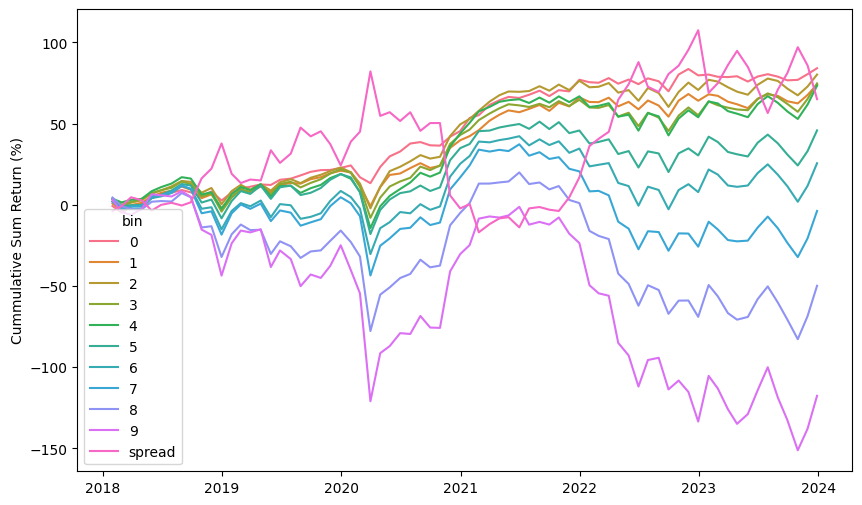

In [104]:
plt.figure(figsize=(10, 6))
sns.lineplot(port, x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

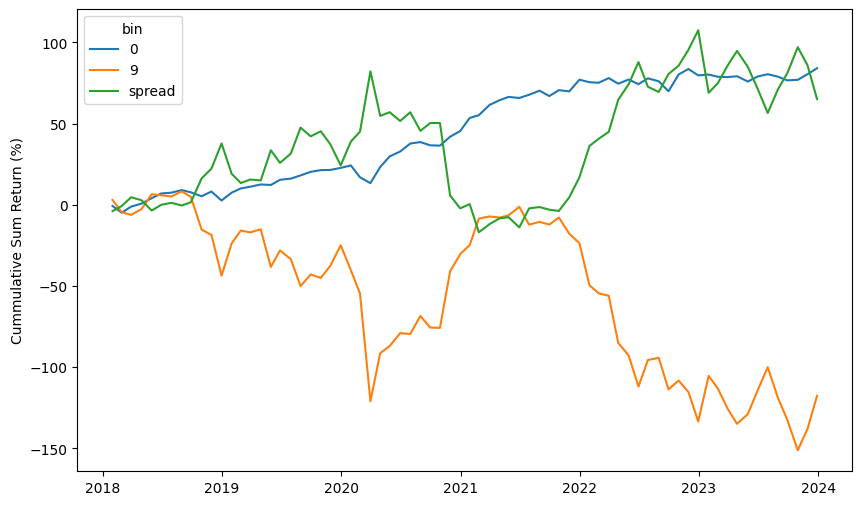

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    port.filter(pl.col("bin").is_in(["0", "9", "spread"])), x="date", y="cumret", hue="bin"
)
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

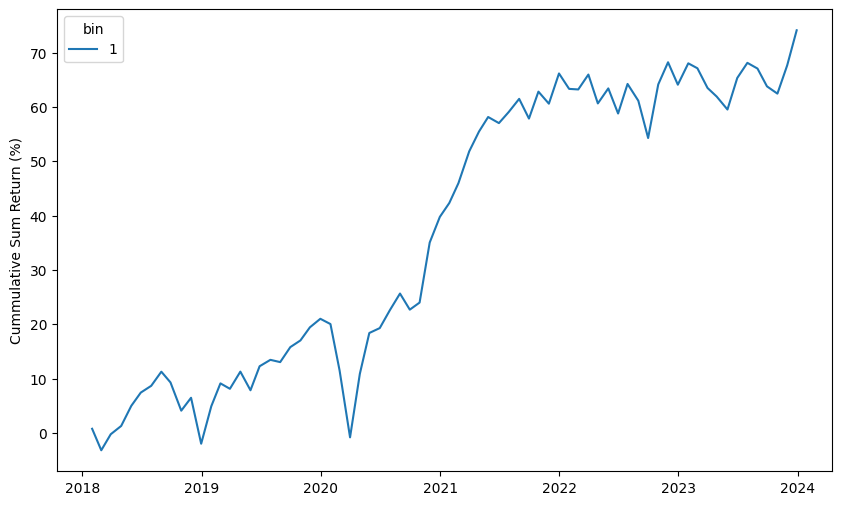

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(port.filter(pl.col("bin") == "1"), x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

In [107]:
spread = port.filter(pl.col("bin") == "0").sort("date")["ret"]

portfolio_er = spread.mean()
portfolio_vol = np.sqrt(spread.std())

portfolio_sharpe = (portfolio_er / portfolio_vol) * np.sqrt(252)

print(f"Portfolio sharpe: {portfolio_sharpe:.4f}")

Portfolio sharpe: 1.0480
